In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Parameters

In [2]:
ORGANISMS = [9606]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # TODO If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    96
sugar transmembrane transporter activity         26
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    96
sugar transmembrane transporter activity         25
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 121 sequences into 108 clusters at threshold 70


go_term_ancestor
amino acid transmembrane transporter activity    84
sugar transmembrane transporter activity         24
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-05-29 02:00:05.258005: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 02:00:05.317521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748476805.327341    2290 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748476805.331235    2290 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 02:00:05.397270: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQVIVQRVLAAKNIAHAKGSTLMAGFLKLLPMFIIVVPGMISRILFTDDIACINPEHCMLVCGSRAGCSNIAYPRLVMKLVPVGLRGLMMAVMIAALMSDLDSIFNSASTIFTLDVYKLIRKSASSRELMIVGRIFVAFMVVISIAWVPIIVEMQGGQMYLYIQEVADYLTPPVAALFLLAIFWKRCNEQGAFYGGMAGFVLGAVRLILAFAYRAPECDQPDNRPGFIKDIHYMYVATGLFWVTGLITVIVSLLTPPPTKEQIRTTTFWSKKNLVVKENCSPKEEPYQMQEKSILRCSENNETINHIIPNGKSEDSIKGLQPEDVNLLVTCREEGNPVASLGHSEAETPVDAYSNGQAALMGEKERKKETDDGGRYWKFIDWFCGFKSKSLSKRSLRDLMEEEAVCLQMLEETRQVKVILNIGLFAVCSLGIFMFVYFSL
MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQV

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets
ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.37999826, 0.79312124, 0.03448449, ..., 0.44273408, 0.62055   ,
          0.45716445],
         [0.74137613, 0.0173694 , 0.68044458, ..., 0.8116799 , 0.0728516 ,
          0.75540671],
         [0.55753458, 0.92016344, 0.79892267, ..., 0.08223595, 0.14955304,
          0.04092409]], shape=(108, 1024)),
  array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 

In [10]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [11]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

In [12]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long


df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=["balanced_accuracy", "f1_macro"],
)

=== DUMMY ===
balanced_accuracy: 0.48+-0.08
f1_macro: 0.43+-0.10
=== AAC ===
balanced_accuracy: 0.66+-0.11
f1_macro: 0.62+-0.10
=== PAAC ===
balanced_accuracy: 0.70+-0.10
f1_macro: 0.69+-0.11
=== AA_KMER3 ===
balanced_accuracy: 0.81+-0.08
f1_macro: 0.76+-0.09
=== 3Di_COMP ===
balanced_accuracy: 0.79+-0.10
f1_macro: 0.76+-0.09
=== 3Di_KMER2 ===
balanced_accuracy: 0.85+-0.09
f1_macro: 0.87+-0.08
=== 3Di_KMER3 ===
balanced_accuracy: 0.82+-0.10
f1_macro: 0.80+-0.10
=== COMB_KMER1 ===
balanced_accuracy: 0.79+-0.10
f1_macro: 0.79+-0.10
=== COMB_KMER2 ===
balanced_accuracy: 0.84+-0.09
f1_macro: 0.83+-0.10
=== COMB_KMER3 ===
balanced_accuracy: 0.86+-0.08
f1_macro: 0.82+-0.08
=== PROTT5_AA ===
balanced_accuracy: 0.89+-0.08
f1_macro: 0.90+-0.08
=== PROSTT5_AA ===
balanced_accuracy: 0.91+-0.08
f1_macro: 0.90+-0.09
=== PROSTT5_3DI ===
balanced_accuracy: 0.91+-0.07
f1_macro: 0.91+-0.08
=== PSSM_50_1 ===
balanced_accuracy: 0.74+-0.11
f1_macro: 0.75+-0.11
=== PSSM_50_3 ===
balanced_accuracy: 0.82+-0.

In [13]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature     Metric                                         
3Di_COMP    balanced_accuracy  0.785574  0.778676  0.099615
            f1_macro           0.759969  0.741176  0.095903
3Di_KMER2   balanced_accuracy  0.854309  0.869669  0.088685
            f1_macro           0.870379  0.868750  0.079834
3Di_KMER3   balanced_accuracy  0.822574  0.819853  0.097443
            f1_macro           0.799599  0.816716  0.099347
AAC         balanced_accuracy  0.658676  0.669853  0.112195
            f1_macro           0.618289  0.610922  0.102675
AA_KMER3    balanced_accuracy  0.809529  0.811765  0.082440
            f1_macro           0.759710  0.770833  0.093978
COMB_KMER1  balanced_accuracy  0.793404  0.800000  0.102565
            f1_macro           0.786086  0.802863  0.097606
COMB_KMER2  balanced_accuracy  0.839713  0.857169  0.091792
            f1_macro           0.827831  0.840908  0.098856
COMB_KMER3  balanced_accuracy  0.856846  0.870588  0.081566
            f1_macro           0.821066  0.832891  0.085675
DUMMY       balanced_accuracy  0.484529  0.500000  0.084758
            f1_macro           0.429728  0.432432  0.103879
META        balanced_accuracy  0.737603  0.745588  0.108776
            f1_macro           0.742339  0.745174  0.112402
META_STD    balanced_accuracy  0.829368  0.845588  0.098735
            f1_macro           0.836149  0.847222  0.101599
PAAC        balanced_accuracy  0.697221  0.700000  0.097748
            f1_macro           0.691836  0.694444  0.110897
PROSTT5_3DI balanced_accuracy  0.911353  0.900000  0.075109
            f1_macro           0.908140  0.930159  0.077144
PROSTT5_AA  balanced_accuracy  0.908647  0.900000  0.080525
            f1_macro           0.898627  0.921789  0.089645
PROTT5_AA   balanced_accuracy  0.892904  0.887500  0.078630
            f1_macro           0.899387  0.921789  0.075890
PSSM_50_1   balanced_accuracy  0.739169  0.741176  0.111742
            f1_macro           0.745341  0.742017  0.112525
PSSM_50_3   balanced_accuracy  0.817890  0.800000  0.112655
            f1_macro           0.821627  0.816716  0.110672
PSSM_90_1   balanced_accuracy  0.769824  0.784559  0.128400
            f1_macro           0.757328  0.779356  0.126712
PSSM_90_3   balanced_accuracy  0.769824  0.784559  0.128400
            f1_macro           0.757328  0.779356  0.126712
PSSM_META   balanced_accuracy  0.754647  0.755882  0.107890
            f1_macro           0.748073  0.744015  0.105269

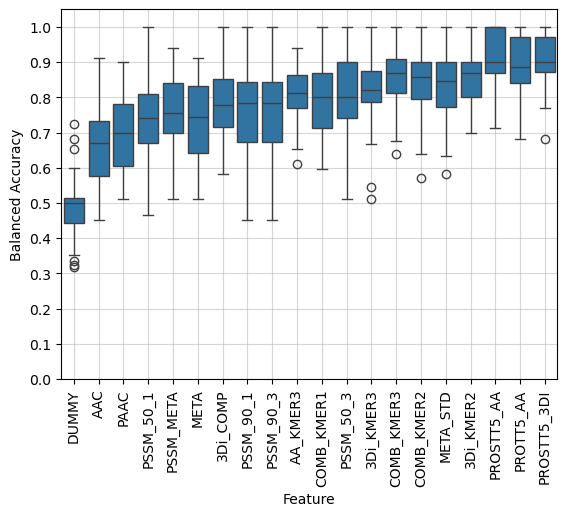

In [14]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["balanced_accuracy"]
)

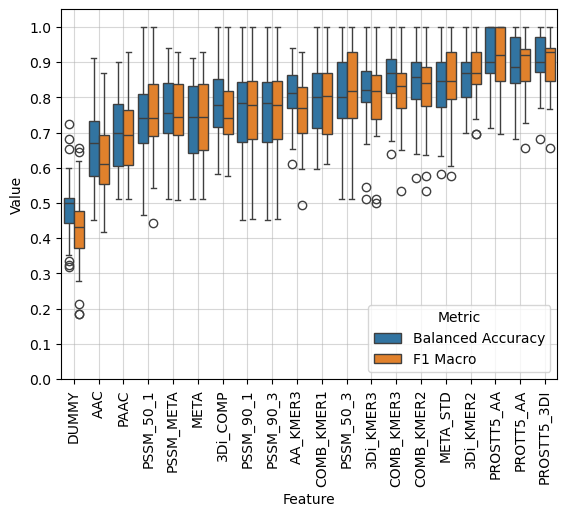

In [15]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["balanced_accuracy", "f1_macro"]
)